## Simple Linear Regression

In [1]:
#Import package

import pandas #dataframe package
import numpy #matrix package
import os #path package
import pickle #model package

import seaborn as sns #visualization package
import matplotlib.pyplot as plt #visualization package
%matplotlib inline

import warnings #warning package
warnings.filterwarnings('ignore')

#model package
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error

#model selection
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import cross_val_score, cross_val_predict

In [2]:
#root directory  
path =  os.getcwd()
pathData = path+'\data'
namefile = '\data_salary.csv' 

In [3]:
#load data
df = pandas.read_csv(pathData+namefile)
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [4]:
#info data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#preprocessing data
df['Salary'] = df['Salary'].astype(int)

In [6]:
#statistic data
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


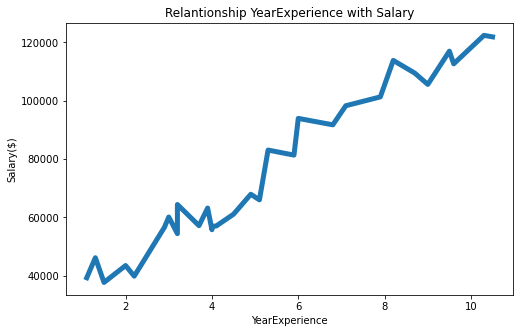

In [7]:
#data visualization with line plot
fig=plt.figure(figsize=(8,5))
plt.plot(df['YearsExperience'],df['Salary'],linewidth=5)
plt.title('Relantionship YearExperience with Salary')
plt.xlabel('YearExperience')
plt.ylabel('Salary($)')
plt.show()

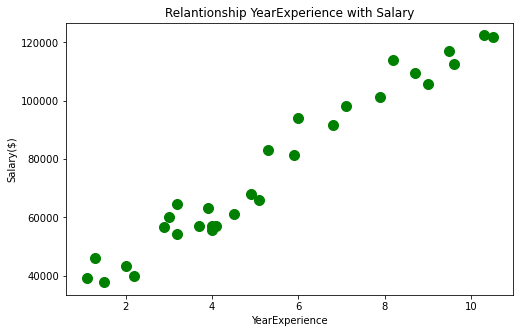

In [8]:
#data visualization with scatter plot
fig=plt.figure(figsize=(8,5))
plt.scatter(df['YearsExperience'],df['Salary'],color='green',s=100)
plt.title('Relantionship YearExperience with Salary')
plt.xlabel('YearExperience')
plt.ylabel('Salary($)')
plt.show()

In [9]:
#convert data into numpy array 
#YearExperience -> varX 2Dimension
#Salary -> varY 1Dimension

varX = numpy.reshape(df['YearsExperience'].values,(-1,1))
varY = numpy.array(df['Salary'])

print('Dimension of array varX:'+''+str(varX.ndim)+'D')
print('Dimension of array varY:'+''+str(varY.ndim)+'D')

Dimension of array varX:2D
Dimension of array varY:1D


In [42]:
#build model simple linear regression
model = LinearRegression()
model.fit(varX,varY)
intercept = model.intercept_
coef = model.coef_

#convert float into integer
interceptInt = int(intercept)
coefInt = int(coef[0])

def strNumber(num):
    if num > 0:
        num = '+'+str(num)
    else:
        num = '-'+str(num)
    return num

print('Model has been build ...')
print('Model.......... formula: '+str(interceptInt)+strNumber(coefInt)+'*YearExperience')

#get prediction of model
varPrediction = model.predict(varX)
varPrediction = [int(varPrediction[i]) for i in range(len(varPrediction))]
varPrediction  = numpy.array(varPrediction)

print('Model.......... prediction: has been load')

#model accurancy
accurancyModel = model.score(varX,varY)
accurancyflot = round(accurancyModel,4)
accurancyPersen = accurancyflot*100

print('Model.......... accurancy:'+str(accurancyflot)+' or '+str(accurancyPersen)+'%')

#model evaluation
# value = median_absolute_error(varX, varPrediction)
# print('Model.......... accurancy:')

#export model
path =  os.getcwd()
pathModel = path+'\model'
nameModel = 'modelSimpleLinearRegression.pkl'

if not os.path.exists(pathModel):
    os.makedirs(pathModel)
    
with open(pathModel+'\\'+nameModel, 'wb') as file:
    pickle.dump(model, file)
    
print('Model.......... export: ' +nameModel)

#dataframe result with column prediction
df['Prediction'] = varPrediction
df['Residual'] = abs(df['Salary'] - df['Prediction'])
df.head(3)

Model has been build ...
Model.......... formula: 25792+9449*YearExperience
Model.......... prediction: has been load
Model.......... accurancy:0.957 or 95.7%
Model.......... export: modelSimpleLinearRegression.pkl


,YearsExperience,Salary,Prediction,Residual
0,1.1,39343,36187,3156
1,1.3,46205,38077,8128
2,1.5,37731,39967,2236


In [47]:
#regression metrics for model performance

#rmse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(varY, varPrediction)
rmse = numpy.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

#r2 score
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(varY, varPrediction)))

RMSE value: 5592.1601
R2 Score value: 0.9570


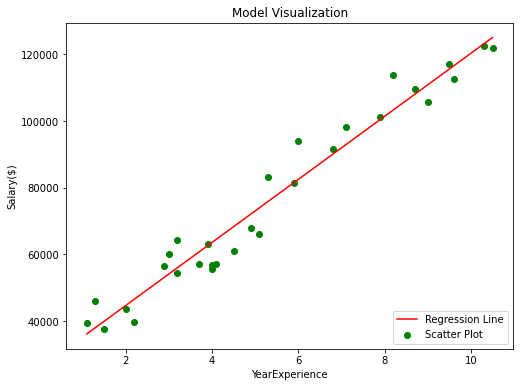

In [53]:
#modelling visualization with data
fig = plt.figure(figsize=(8,6))
plt.scatter(df['YearsExperience'], df['Salary'],color='green',label='Scatter Plot')
plt.plot(df['YearsExperience'],df['Prediction'],color='red',label = 'Regression Line')
plt.title('Model Visualization')
plt.xlabel('YearExperience')
plt.ylabel('Salary($)')
plt.legend(loc=4)
plt.show()

In [54]:
#model selection and cross-validation
#training and scallable model

X_train, X_test, y_train, y_test = train_test_split(varX,varY, train_size = 0.7, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)

scoreTrain = round(model.score(X_train, y_train),4)
scoreTest = round(model.score(X_test, y_test),4)
print('Accurancy model with..... data train: '+str(scoreTrain))
print('Accurancy model with..... data test: '+str(scoreTest))

#export model
path =  os.getcwd()
pathModel = path+'\model'
nameModel = 'modelSimpleLinearRegression_v1.pkl'

if not os.path.exists(pathModel):
    os.makedirs(pathModel)
    
with open(pathModel+'\\'+nameModel, 'wb') as file:
    pickle.dump(model, file)
    
print('Export-Model ' +nameModel)


Accurancy model with..... data train: 0.9424
Accurancy model with..... data test: 0.9741
Export-Model modelSimpleLinearRegression_v1.pkl


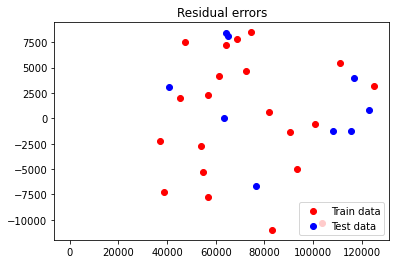

In [58]:
# Plotting residual errors

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 100, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [46]:
#croos-validation
import statistics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=0, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, varX, varY, scoring='r2', cv=cv)

print(scores)
print('Accuracy: %.3f (%.3f)' % (statistics.mean(scores), statistics.stdev(scores)))

[0.98816952 0.92579174 0.92523859 0.87851891 0.96461205]
Accuracy: 0.936 (0.042)


In [14]:
#test load model
pathRoot =  os.getcwd()
pathFile = pathRoot+'\model'
nameFile = 'modelSimpleLinearRegression.pkl'
locFile = pathFile+'\\'+nameFile    
with open(locFile, 'rb') as file:
    model = pickle.load(file)

In [16]:
#inpput value has number (int,float)
inputValue = 2
inputList =  []

inputList.append(inputValue)
inputArray = numpy.reshape(inputList,(-1,1))
ouputValue = model.predict(inputArray)
ouputValue = int(ouputValue[0])

print('Result Prediction with '+str(inputValue)+' Year Experience'+': $ '+str(ouputValue))

Result Prediction with 2 Year Experience: $ 44692
